In [1]:
import random
import numpy as np
import warnings

import dataset
import smooth

random.seed(0)
np.random.seed(0)
warnings.filterwarnings('ignore')

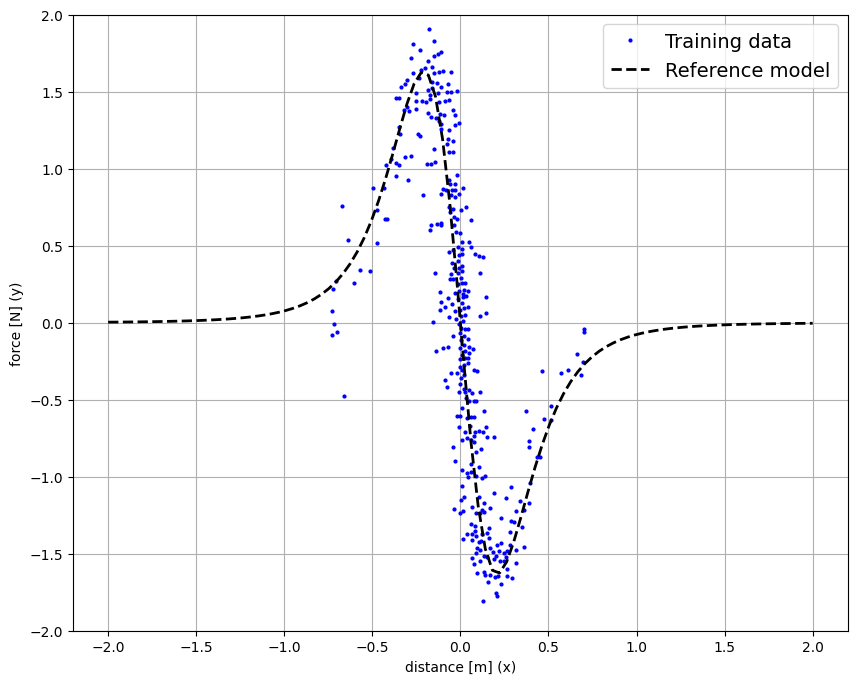

In [2]:
S = dataset.MagmanDatasetScaled()
#S.sample(size=500, noise=0.05)
S.load('data/magman.csv')
#S.erase(-0.3, 0.3)
S.plot()

In [3]:
"""tspl = taylor_spline.TaylorSpline(0., 3, S.xl, S.xu)
tspl.fit(S)

print(f"Fitness: {tspl.fitness(S)}")
S.plot()
tspl.plot()"""

'tspl = taylor_spline.TaylorSpline(0., 3, S.xl, S.xu)\ntspl.fit(S)\n\nprint(f"Fitness: {tspl.fitness(S)}")\nS.plot()\ntspl.plot()'

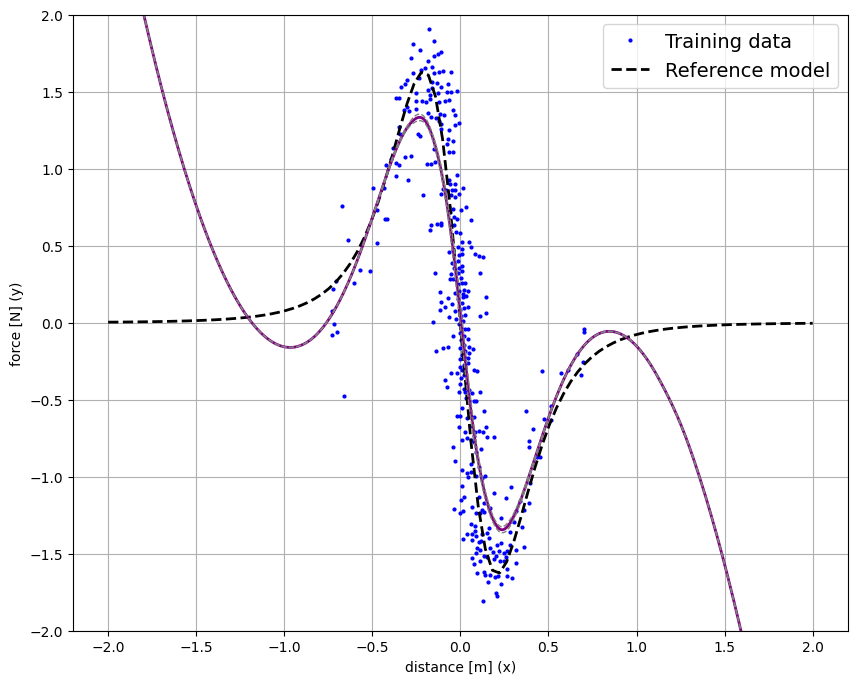

In [4]:
"""%matplotlib widget
import ipywidgets as widgets
import taylor_spline

S.plot()
prev_drawings = []
@widgets.interact(x0=(S.xl, S.xu, 0.01), deg=(0, 10, 1), exp_cov=(0.01, 0.5, 0.01))
def update(x0=0., deg=4, exp_cov=0.2):
    global prev_drawings

    tspline_fitter = taylor_spline.TaylorSplineEstimator()
    tspline = tspline_fitter.fit(S, deg, silent=True, x0=x0, exp_cov=exp_cov)

    for d in prev_drawings: d.remove()
    prev_drawings = []
    
    print(f"Fitness: {tspline.fitness(S)}")
    prev_drawings += tspline.plot(show=False)
"""

smoother = smooth.Smoother(S, 2)
smoother.smoth()